## Data Understanding

In [ ]:
import pandas as pd 
df=pd.read_csv('./Datas_vitalait.csv', encoding='latin-1',sep=";")

### Data Description

In [3]:
print("Dimensions of the dataset:", df.shape)
df.describe(include='all')


Dimensions of the dataset: (25946, 14)


,Ordre de travail,Staut Ordre de travail,Service,Description,Equipment,Nom Equipement,date enregistrement,Noeud Parent,Nom_parent,Classification Equipement,Date début,Date Fin,Modèle OT,Type OT
count,25946,25946,25904,25339,16828,16828,4800,16828,16828,10616,16828,16828,0.0,16828
unique,25144,6,3260,19761,1093,931,4423,197,180,11,1170,1170,NaN,2
top,OT21188110,en cours INV,MECANIQUE,changement dolly,PFC206,A3/FLEX,15/01/2022 09:50,PFC1,conditionnement 1,Mec,21/10/2019,12/01/2019,NaN,correctif planifié
freq,7,11650,3700,263,881,990,4,2310,2310,7587,70,67,NaN,11642
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Number of pannes per equipment


In [4]:
#after uninstallling all related files in C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages matplotlib

#matplotlib-3.10.3.dist-info (or any folder that starts with matplotlib-)

#~atplotlib

#mpl_toolkits
#!pip install matplotlib


In [5]:
#run this
#!pip install matplotlib ipympl notebook jupyterlab jupyter matplotlib-inline


In [6]:
# 3. After restarting, run the following code in a new cell:

import matplotlib.pyplot as plt  # visualization library
import seaborn as sns
import matplotlib.cm as cm  # visualization library
import numpy as np

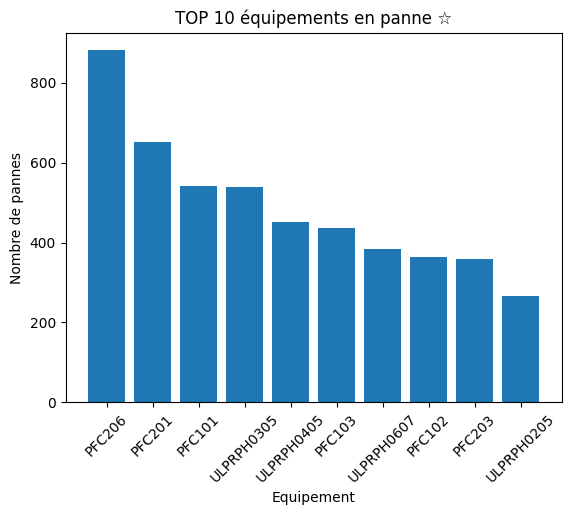

In [7]:
# 1. First, run this cell to reinstall the packages:


# 2. Then, restart the kernel (Kernel > Restart Kernel) before running the next cell.



df_st = df.groupby(['Equipment']).count()
df_st1 = df_st['Ordre de travail']
df_st2 = df_st1.rename_axis('Equipement').reset_index()
df_st2.rename(columns={'Ordre de travail': 'Nombre de pannes'}, inplace=True)
top10 = df_st2.sort_values('Nombre de pannes', ascending=False).head(10)  # ordre décroissant
plt.xticks(rotation=45)
plt.title("TOP 10 équipements en panne ☆")
plt.xlabel('Equipement')
plt.ylabel("Nombre de pannes")
plt.bar(top10['Equipement'], top10['Nombre de pannes'])
plt.show()



### Distribution of pannes


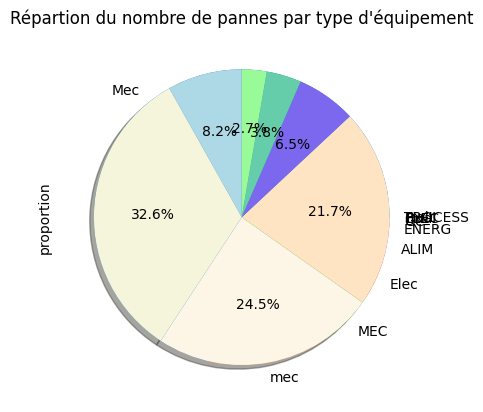

In [8]:
df["Classification Equipement"].value_counts(normalize=True).plot(kind='pie')
plt.title("Répartion du nombre de pannes par type d'équipement")
colors = ['lightblue', 'beige','oldlace','bisque','mediumslateblue','mediumaquamarine','palegreen']
sizes = [15, 60,45, 40,12,7,5]
plt.pie(sizes, colors=colors,autopct='%1.1f%%', shadow=True, startangle=90)
plt.savefig('PieChart02.png')
plt.show()

## Part 2:  Data pré-processing

###  unused data ( Champs : Staut Ordre de travail;Modèle OT;Service)

In [9]:
df=df.drop(['Modèle OT','Staut Ordre de travail','Service'], axis = 1)
df.shape
df.head(10)

,Ordre de travail,Description,Equipment,Nom Equipement,date enregistrement,Noeud Parent,Nom_parent,Classification Equipement,Date début,Date Fin,Type OT
0,OT000001,NaN,GCULZ201,Production Beurre creme fraiche,NaN,GCULZ2,Zone 2,Mec,03/01/2019,03/01/2019,correctif planifié
1,OT000002,NaN,GCULZ103,Production UHT,NaN,GCULZ1,Zone 1,Mec,02/01/2019,02/01/2019,correctif planifié
2,OT000003,NaN,ULPRPH0104,TBA/8,NaN,ULPRPH01,UHT A,Mec,03/01/2019,03/01/2019,correctif planifié
3,OT000011,NaN,ULPRPH0104,TBA/8,NaN,ULPRPH01,UHT A,Mec,03/01/2019,03/01/2019,correctif planifié
4,OT000012,Préparation les nouveaux têtes scellage,ULPRPS0204,REMPLISSEUSE-CAPSULEUSE,02/01/2019 10:00,ULPRPS02,BOUTEILLE,NaN,02/01/2019,02/01/2019,correctif planifié
5,OT000015,NaN,ULPRDV0103,TRANSPALETTE TC14- Hors service,NaN,ULPRDV01,TRANSPALETTE,Mec,01/01/2019,01/01/2019,correctif planifié
6,OT000021,NaN,ULPRPT0101,STATION DOSAGE SOUDE ET ACIDE CONCENTRE,NaN,ULPRPT01,NEP,ALIM,02/01/2019,03/01/2019,correctif planifié
7,OT000023,NaN,PFC105,Posimat A,02/01/2019 14:28,PFC1,conditionnement 1,Mec,02/01/2019,02/01/2019,correctif non planifié
8,OT000031,NaN,ULUTEG0106,circuit eau glacé,NaN,ULUTEG01,PRODUCTION EAU GLACCE,Mec,02/01/2019,03/01/2019,correctif planifié
9,OT000064,NaN,PFC109,Sleever B (10000853-417),03/01/2019 10:19,PFC1,conditionnement 1,Mec,03/01/2019,03/01/2019,correctif planifié


### non normed data

In [10]:
dicoCL = {
   "Mec" : "Mécanique",  
   "MEC" : "Mécanique",  
   "mec" : "Mécanique",
   "ELEC" : "Electrique",
   "Elec": "Electrique",  
   "ENERG" : "Energetique", 
   "PROCESS": "Process"
}

df.rename(columns={'Classification Equipement': 'Classification_Equipement'}, inplace=True)
df.Classification_Equipement= df.Classification_Equipement.map(dicoCL) # . map
df['Classification_Equipement'].unique()
df.head(10)

,Ordre de travail,Description,Equipment,Nom Equipement,date enregistrement,Noeud Parent,Nom_parent,Classification_Equipement,Date début,Date Fin,Type OT
0,OT000001,NaN,GCULZ201,Production Beurre creme fraiche,NaN,GCULZ2,Zone 2,Mécanique,03/01/2019,03/01/2019,correctif planifié
1,OT000002,NaN,GCULZ103,Production UHT,NaN,GCULZ1,Zone 1,Mécanique,02/01/2019,02/01/2019,correctif planifié
2,OT000003,NaN,ULPRPH0104,TBA/8,NaN,ULPRPH01,UHT A,Mécanique,03/01/2019,03/01/2019,correctif planifié
3,OT000011,NaN,ULPRPH0104,TBA/8,NaN,ULPRPH01,UHT A,Mécanique,03/01/2019,03/01/2019,correctif planifié
4,OT000012,Préparation les nouveaux têtes scellage,ULPRPS0204,REMPLISSEUSE-CAPSULEUSE,02/01/2019 10:00,ULPRPS02,BOUTEILLE,NaN,02/01/2019,02/01/2019,correctif planifié
5,OT000015,NaN,ULPRDV0103,TRANSPALETTE TC14- Hors service,NaN,ULPRDV01,TRANSPALETTE,Mécanique,01/01/2019,01/01/2019,correctif planifié
6,OT000021,NaN,ULPRPT0101,STATION DOSAGE SOUDE ET ACIDE CONCENTRE,NaN,ULPRPT01,NEP,NaN,02/01/2019,03/01/2019,correctif planifié
7,OT000023,NaN,PFC105,Posimat A,02/01/2019 14:28,PFC1,conditionnement 1,Mécanique,02/01/2019,02/01/2019,correctif non planifié
8,OT000031,NaN,ULUTEG0106,circuit eau glacé,NaN,ULUTEG01,PRODUCTION EAU GLACCE,Mécanique,02/01/2019,03/01/2019,correctif planifié
9,OT000064,NaN,PFC109,Sleever B (10000853-417),03/01/2019 10:19,PFC1,conditionnement 1,Mécanique,03/01/2019,03/01/2019,correctif planifié


### converting dates

In [11]:
df["Date début"]= pd.to_datetime(df["Date début"],errors = 'coerce')
df["Date Fin"]= pd.to_datetime(df["Date Fin"],errors = 'coerce')


### dropping duplicates

In [12]:
dfx=df
df= df.drop_duplicates(subset=['Ordre de travail'])

print("Old data frame length:", len(dfx)) 
print("New data frame length:", len(df))  
print("Number of Duplicate rows : ", 
      (len(dfx)-len(df))) 


Old data frame length: 25946
New data frame length: 25144
Number of Duplicate rows :  802


### null data??

In [13]:
print(df.isnull().sum())


Ordre de travail                 0
Description                    603
Equipment                     8458
Nom Equipement                8458
date enregistrement          20378
Noeud Parent                  8458
Nom_parent                    8458
Classification_Equipement    14999
Date début                   18259
Date Fin                     18472
Type OT                       8458
dtype: int64


### dropping null values

In [15]:
df1=df
df=df.dropna(subset=['Equipment', 'Nom Equipement','Noeud Parent','Nom_parent','Date début','Date Fin','Type OT' ])
print("Old data frame length:", len(df1)) 
print("New data frame length:", len(df))  
print("Number of rows with at least 1 NA value: ", 
      (len(df1)-len(df))) 

df.head(10)

Old data frame length: 6640
New data frame length: 6640
Number of rows with at least 1 NA value:  0


,Ordre de travail,Description,Equipment,Nom Equipement,date enregistrement,Noeud Parent,Nom_parent,Classification_Equipement,Date début,Date Fin,Type OT
0,OT000001,NaN,GCULZ201,Production Beurre creme fraiche,NaN,GCULZ2,Zone 2,Mécanique,2019-03-01,2019-03-01,correctif planifié
1,OT000002,NaN,GCULZ103,Production UHT,NaN,GCULZ1,Zone 1,Mécanique,2019-02-01,2019-02-01,correctif planifié
2,OT000003,NaN,ULPRPH0104,TBA/8,NaN,ULPRPH01,UHT A,Mécanique,2019-03-01,2019-03-01,correctif planifié
3,OT000011,NaN,ULPRPH0104,TBA/8,NaN,ULPRPH01,UHT A,Mécanique,2019-03-01,2019-03-01,correctif planifié
4,OT000012,Préparation les nouveaux têtes scellage,ULPRPS0204,REMPLISSEUSE-CAPSULEUSE,02/01/2019 10:00,ULPRPS02,BOUTEILLE,NaN,2019-02-01,2019-02-01,correctif planifié
5,OT000015,NaN,ULPRDV0103,TRANSPALETTE TC14- Hors service,NaN,ULPRDV01,TRANSPALETTE,Mécanique,2019-01-01,2019-01-01,correctif planifié
6,OT000021,NaN,ULPRPT0101,STATION DOSAGE SOUDE ET ACIDE CONCENTRE,NaN,ULPRPT01,NEP,NaN,2019-02-01,2019-03-01,correctif planifié
7,OT000023,NaN,PFC105,Posimat A,02/01/2019 14:28,PFC1,conditionnement 1,Mécanique,2019-02-01,2019-02-01,correctif non planifié
8,OT000031,NaN,ULUTEG0106,circuit eau glacé,NaN,ULUTEG01,PRODUCTION EAU GLACCE,Mécanique,2019-02-01,2019-03-01,correctif planifié
9,OT000064,NaN,PFC109,Sleever B (10000853-417),03/01/2019 10:19,PFC1,conditionnement 1,Mécanique,2019-03-01,2019-03-01,correctif planifié


### other missing values

In [17]:
#missing values - categorical - solution
df['Description'] = df['Description'].fillna('Pas de Descriprion')
print(df['Description'].isnull().sum())
df.head(10)


0


,Ordre de travail,Description,Equipment,Nom Equipement,date enregistrement,Noeud Parent,Nom_parent,Classification_Equipement,Date début,Date Fin,Type OT
0,OT000001,Pas de Descriprion,GCULZ201,Production Beurre creme fraiche,NaN,GCULZ2,Zone 2,Mécanique,2019-03-01,2019-03-01,correctif planifié
1,OT000002,Pas de Descriprion,GCULZ103,Production UHT,NaN,GCULZ1,Zone 1,Mécanique,2019-02-01,2019-02-01,correctif planifié
2,OT000003,Pas de Descriprion,ULPRPH0104,TBA/8,NaN,ULPRPH01,UHT A,Mécanique,2019-03-01,2019-03-01,correctif planifié
3,OT000011,Pas de Descriprion,ULPRPH0104,TBA/8,NaN,ULPRPH01,UHT A,Mécanique,2019-03-01,2019-03-01,correctif planifié
4,OT000012,Préparation les nouveaux têtes scellage,ULPRPS0204,REMPLISSEUSE-CAPSULEUSE,02/01/2019 10:00,ULPRPS02,BOUTEILLE,NaN,2019-02-01,2019-02-01,correctif planifié
5,OT000015,Pas de Descriprion,ULPRDV0103,TRANSPALETTE TC14- Hors service,NaN,ULPRDV01,TRANSPALETTE,Mécanique,2019-01-01,2019-01-01,correctif planifié
6,OT000021,Pas de Descriprion,ULPRPT0101,STATION DOSAGE SOUDE ET ACIDE CONCENTRE,NaN,ULPRPT01,NEP,NaN,2019-02-01,2019-03-01,correctif planifié
7,OT000023,Pas de Descriprion,PFC105,Posimat A,02/01/2019 14:28,PFC1,conditionnement 1,Mécanique,2019-02-01,2019-02-01,correctif non planifié
8,OT000031,Pas de Descriprion,ULUTEG0106,circuit eau glacé,NaN,ULUTEG01,PRODUCTION EAU GLACCE,Mécanique,2019-02-01,2019-03-01,correctif planifié
9,OT000064,Pas de Descriprion,PFC109,Sleever B (10000853-417),03/01/2019 10:19,PFC1,conditionnement 1,Mécanique,2019-03-01,2019-03-01,correctif planifié


In [ ]:
#all missing values from "Classification_Equipement" will be changed into the most frequent One
from sklearn.impute import SimpleImputer

imputer = SimpleImputer( strategy='most_frequent')


df.Classification_Equipement = imputer.fit_transform(df['Classification_Equipement'].values.reshape(-1,1))[:,0]


#Affichage résultat
print(df['Classification_Equipement'].isnull().sum())
df['Classification_Equipement'].unique()
df.head(10)

0


,Ordre de travail,Description,Equipment,Nom Equipement,date enregistrement,Noeud Parent,Nom_parent,Classification_Equipement,Date début,Date Fin,Type OT
0,OT000001,Pas de Descriprion,GCULZ201,Production Beurre creme fraiche,NaN,GCULZ2,Zone 2,Mécanique,2019-03-01,2019-03-01,correctif planifié
1,OT000002,Pas de Descriprion,GCULZ103,Production UHT,NaN,GCULZ1,Zone 1,Mécanique,2019-02-01,2019-02-01,correctif planifié
2,OT000003,Pas de Descriprion,ULPRPH0104,TBA/8,NaN,ULPRPH01,UHT A,Mécanique,2019-03-01,2019-03-01,correctif planifié
3,OT000011,Pas de Descriprion,ULPRPH0104,TBA/8,NaN,ULPRPH01,UHT A,Mécanique,2019-03-01,2019-03-01,correctif planifié
4,OT000012,Préparation les nouveaux têtes scellage,ULPRPS0204,REMPLISSEUSE-CAPSULEUSE,02/01/2019 10:00,ULPRPS02,BOUTEILLE,Mécanique,2019-02-01,2019-02-01,correctif planifié
5,OT000015,Pas de Descriprion,ULPRDV0103,TRANSPALETTE TC14- Hors service,NaN,ULPRDV01,TRANSPALETTE,Mécanique,2019-01-01,2019-01-01,correctif planifié
6,OT000021,Pas de Descriprion,ULPRPT0101,STATION DOSAGE SOUDE ET ACIDE CONCENTRE,NaN,ULPRPT01,NEP,Mécanique,2019-02-01,2019-03-01,correctif planifié
7,OT000023,Pas de Descriprion,PFC105,Posimat A,02/01/2019 14:28,PFC1,conditionnement 1,Mécanique,2019-02-01,2019-02-01,correctif non planifié
8,OT000031,Pas de Descriprion,ULUTEG0106,circuit eau glacé,NaN,ULUTEG01,PRODUCTION EAU GLACCE,Mécanique,2019-02-01,2019-03-01,correctif planifié
9,OT000064,Pas de Descriprion,PFC109,Sleever B (10000853-417),03/01/2019 10:19,PFC1,conditionnement 1,Mécanique,2019-03-01,2019-03-01,correctif planifié


In [36]:

import pandas as pd
import numpy as np
import datetime as dt
# Convert 'date enregistrement' to datetime format, coercing errors
df['date enregistrement'] = pd.to_datetime(df['date enregistrement'], errors='coerce')

# Calculate the difference in days between 'Date début' and 'date enregistrement'
df['day_diff'] = (df['Date début'] - df['date enregistrement']).dt.days

# Calculate the average number of days (ignoring missing values)
avg_days = round(df['day_diff'].dropna().abs().mean())

# Fill missing 'date enregistrement' by subtracting average days from 'Date début'
for row_index in df.index:
    # Check if 'date enregistrement' is missing for this row
    if pd.isna(df.loc[row_index, 'date enregistrement']):
        # Calculate new date by subtracting avg_days from 'Date début'
        new_date = df.loc[row_index, 'Date début'] - pd.Timedelta(days=avg_days)
        # Assign the new date back to 'date enregistrement'
        df.loc[row_index, 'date enregistrement'] = new_date


df.head(20)

,Ordre de travail,Description,Equipment,Nom Equipement,date enregistrement,Noeud Parent,Nom_parent,Classification_Equipement,Date début,Date Fin,Type OT,day_diff,day
0,OT000001,Pas de Descriprion,GCULZ201,Production Beurre creme fraiche,2019-02-13 00:00:00,GCULZ2,Zone 2,Mécanique,2019-03-01,2019-03-01,correctif planifié,16,16 days 00:00:00
1,OT000002,Pas de Descriprion,GCULZ103,Production UHT,2019-01-16 00:00:00,GCULZ1,Zone 1,Mécanique,2019-02-01,2019-02-01,correctif planifié,16,16 days 00:00:00
2,OT000003,Pas de Descriprion,ULPRPH0104,TBA/8,2019-02-13 00:00:00,ULPRPH01,UHT A,Mécanique,2019-03-01,2019-03-01,correctif planifié,16,16 days 00:00:00
3,OT000011,Pas de Descriprion,ULPRPH0104,TBA/8,2019-02-13 00:00:00,ULPRPH01,UHT A,Mécanique,2019-03-01,2019-03-01,correctif planifié,16,16 days 00:00:00
4,OT000012,Préparation les nouveaux têtes scellage,ULPRPS0204,REMPLISSEUSE-CAPSULEUSE,2019-02-01 10:00:00,ULPRPS02,BOUTEILLE,Mécanique,2019-02-01,2019-02-01,correctif planifié,-1,-1 days +14:00:00
5,OT000015,Pas de Descriprion,ULPRDV0103,TRANSPALETTE TC14- Hors service,2018-12-16 00:00:00,ULPRDV01,TRANSPALETTE,Mécanique,2019-01-01,2019-01-01,correctif planifié,16,16 days 00:00:00
6,OT000021,Pas de Descriprion,ULPRPT0101,STATION DOSAGE SOUDE ET ACIDE CONCENTRE,2019-01-16 00:00:00,ULPRPT01,NEP,Mécanique,2019-02-01,2019-03-01,correctif planifié,16,16 days 00:00:00
7,OT000023,Pas de Descriprion,PFC105,Posimat A,2019-02-01 14:28:00,PFC1,conditionnement 1,Mécanique,2019-02-01,2019-02-01,correctif non planifié,-1,-1 days +09:32:00
8,OT000031,Pas de Descriprion,ULUTEG0106,circuit eau glacé,2019-01-16 00:00:00,ULUTEG01,PRODUCTION EAU GLACCE,Mécanique,2019-02-01,2019-03-01,correctif planifié,16,16 days 00:00:00
9,OT000064,Pas de Descriprion,PFC109,Sleever B (10000853-417),2019-03-01 10:19:00,PFC1,conditionnement 1,Mécanique,2019-03-01,2019-03-01,correctif planifié,-1,-1 days +13:41:00


In [37]:
print(df.isnull().sum())


Ordre de travail             0
Description                  0
Equipment                    0
Nom Equipement               0
date enregistrement          0
Noeud Parent                 0
Nom_parent                   0
Classification_Equipement    0
Date début                   0
Date Fin                     0
Type OT                      0
day_diff                     0
day                          0
dtype: int64


In [38]:
df["Year2"]= df["Date début"].dt.year
df["Year1"]= df["date enregistrement"].dt.year
df["Year3"]= df["Date Fin"].dt.year
df=df[(df.Year1 >= 2019) & (df.Year2 >= 2019) & (df.Year3 >= 2019)]
df.head(10)

,Ordre de travail,Description,Equipment,Nom Equipement,date enregistrement,Noeud Parent,Nom_parent,Classification_Equipement,Date début,Date Fin,Type OT,day_diff,day,Year2,Year1,Year3
0,OT000001,Pas de Descriprion,GCULZ201,Production Beurre creme fraiche,2019-02-13 00:00:00,GCULZ2,Zone 2,Mécanique,2019-03-01,2019-03-01,correctif planifié,16,16 days 00:00:00,2019,2019,2019
1,OT000002,Pas de Descriprion,GCULZ103,Production UHT,2019-01-16 00:00:00,GCULZ1,Zone 1,Mécanique,2019-02-01,2019-02-01,correctif planifié,16,16 days 00:00:00,2019,2019,2019
2,OT000003,Pas de Descriprion,ULPRPH0104,TBA/8,2019-02-13 00:00:00,ULPRPH01,UHT A,Mécanique,2019-03-01,2019-03-01,correctif planifié,16,16 days 00:00:00,2019,2019,2019
3,OT000011,Pas de Descriprion,ULPRPH0104,TBA/8,2019-02-13 00:00:00,ULPRPH01,UHT A,Mécanique,2019-03-01,2019-03-01,correctif planifié,16,16 days 00:00:00,2019,2019,2019
4,OT000012,Préparation les nouveaux têtes scellage,ULPRPS0204,REMPLISSEUSE-CAPSULEUSE,2019-02-01 10:00:00,ULPRPS02,BOUTEILLE,Mécanique,2019-02-01,2019-02-01,correctif planifié,-1,-1 days +14:00:00,2019,2019,2019
6,OT000021,Pas de Descriprion,ULPRPT0101,STATION DOSAGE SOUDE ET ACIDE CONCENTRE,2019-01-16 00:00:00,ULPRPT01,NEP,Mécanique,2019-02-01,2019-03-01,correctif planifié,16,16 days 00:00:00,2019,2019,2019
7,OT000023,Pas de Descriprion,PFC105,Posimat A,2019-02-01 14:28:00,PFC1,conditionnement 1,Mécanique,2019-02-01,2019-02-01,correctif non planifié,-1,-1 days +09:32:00,2019,2019,2019
8,OT000031,Pas de Descriprion,ULUTEG0106,circuit eau glacé,2019-01-16 00:00:00,ULUTEG01,PRODUCTION EAU GLACCE,Mécanique,2019-02-01,2019-03-01,correctif planifié,16,16 days 00:00:00,2019,2019,2019
9,OT000064,Pas de Descriprion,PFC109,Sleever B (10000853-417),2019-03-01 10:19:00,PFC1,conditionnement 1,Mécanique,2019-03-01,2019-03-01,correctif planifié,-1,-1 days +13:41:00,2019,2019,2019
11,OT003799,réparation éclairage au niveau atelier UHT,ULPRPH0608,ECLAIRAGE,2019-03-01 08:01:00,ULPRPH06,DIVERS UHT,Electrique,2019-03-01,2019-03-01,correctif planifié,-1,-1 days +15:59:00,2019,2019,2019


In [39]:
df

,Ordre de travail,Description,Equipment,Nom Equipement,date enregistrement,Noeud Parent,Nom_parent,Classification_Equipement,Date début,Date Fin,Type OT,day_diff,day,Year2,Year1,Year3
0,OT000001,Pas de Descriprion,GCULZ201,Production Beurre creme fraiche,2019-02-13 00:00:00,GCULZ2,Zone 2,Mécanique,2019-03-01,2019-03-01,correctif planifié,16,16 days 00:00:00,2019,2019,2019
1,OT000002,Pas de Descriprion,GCULZ103,Production UHT,2019-01-16 00:00:00,GCULZ1,Zone 1,Mécanique,2019-02-01,2019-02-01,correctif planifié,16,16 days 00:00:00,2019,2019,2019
2,OT000003,Pas de Descriprion,ULPRPH0104,TBA/8,2019-02-13 00:00:00,ULPRPH01,UHT A,Mécanique,2019-03-01,2019-03-01,correctif planifié,16,16 days 00:00:00,2019,2019,2019
3,OT000011,Pas de Descriprion,ULPRPH0104,TBA/8,2019-02-13 00:00:00,ULPRPH01,UHT A,Mécanique,2019-03-01,2019-03-01,correctif planifié,16,16 days 00:00:00,2019,2019,2019
4,OT000012,Préparation les nouveaux têtes scellage,ULPRPS0204,REMPLISSEUSE-CAPSULEUSE,2019-02-01 10:00:00,ULPRPS02,BOUTEILLE,Mécanique,2019-02-01,2019-02-01,correctif planifié,-1,-1 days +14:00:00,2019,2019,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25937,OT380069,Déchirure courroie presse device,ULPRPH0405,A3/FLEX,2021-02-14 00:00:00,ULPRPH04,UHT D,Mécanique,2021-03-02,2021-03-02,correctif non planifié,16,16 days 00:00:00,2021,2021,2021
25938,OT380519,Changement dolly,ULPRPH0405,A3/FLEX,2021-03-17 00:00:00,ULPRPH04,UHT D,Mécanique,2021-04-02,2021-04-02,correctif planifié,16,16 days 00:00:00,2021,2021,2021
25939,OT388140,BC263575,PAV00398,2170 TU 187,2021-12-01 13:23:00,PAV003,Voitures,Mécanique,2021-12-02,2021-12-02,correctif planifié,0,0 days 10:37:00,2021,2021,2021
25940,OT388798,BC263572,PAV00383,2031 TU 171,2021-06-02 13:27:00,PAV003,Voitures,Mécanique,2021-06-02,2021-06-02,correctif planifié,-1,-1 days +10:33:00,2021,2021,2021


In [ ]:
#preprocessing for timeseries
df['date_enreg'] = pd.to_datetime(df['date enregistrement']).dt.date
df1=df


,Ordre de travail,Description,Equipment,Nom Equipement,date enregistrement,Noeud Parent,Nom_parent,Classification_Equipement,Date début,Date Fin,Type OT,day_diff,day,Year2,Year1,Year3,date_enreg
0,OT000001,Pas de Descriprion,GCULZ201,Production Beurre creme fraiche,2019-02-13 00:00:00,GCULZ2,Zone 2,Mécanique,2019-03-01,2019-03-01,correctif planifié,16,16 days 00:00:00,2019,2019,2019,2019-02-13
1,OT000002,Pas de Descriprion,GCULZ103,Production UHT,2019-01-16 00:00:00,GCULZ1,Zone 1,Mécanique,2019-02-01,2019-02-01,correctif planifié,16,16 days 00:00:00,2019,2019,2019,2019-01-16
2,OT000003,Pas de Descriprion,ULPRPH0104,TBA/8,2019-02-13 00:00:00,ULPRPH01,UHT A,Mécanique,2019-03-01,2019-03-01,correctif planifié,16,16 days 00:00:00,2019,2019,2019,2019-02-13
3,OT000011,Pas de Descriprion,ULPRPH0104,TBA/8,2019-02-13 00:00:00,ULPRPH01,UHT A,Mécanique,2019-03-01,2019-03-01,correctif planifié,16,16 days 00:00:00,2019,2019,2019,2019-02-13
4,OT000012,Préparation les nouveaux têtes scellage,ULPRPS0204,REMPLISSEUSE-CAPSULEUSE,2019-02-01 10:00:00,ULPRPS02,BOUTEILLE,Mécanique,2019-02-01,2019-02-01,correctif planifié,-1,-1 days +14:00:00,2019,2019,2019,2019-02-01
6,OT000021,Pas de Descriprion,ULPRPT0101,STATION DOSAGE SOUDE ET ACIDE CONCENTRE,2019-01-16 00:00:00,ULPRPT01,NEP,Mécanique,2019-02-01,2019-03-01,correctif planifié,16,16 days 00:00:00,2019,2019,2019,2019-01-16
7,OT000023,Pas de Descriprion,PFC105,Posimat A,2019-02-01 14:28:00,PFC1,conditionnement 1,Mécanique,2019-02-01,2019-02-01,correctif non planifié,-1,-1 days +09:32:00,2019,2019,2019,2019-02-01
8,OT000031,Pas de Descriprion,ULUTEG0106,circuit eau glacé,2019-01-16 00:00:00,ULUTEG01,PRODUCTION EAU GLACCE,Mécanique,2019-02-01,2019-03-01,correctif planifié,16,16 days 00:00:00,2019,2019,2019,2019-01-16
9,OT000064,Pas de Descriprion,PFC109,Sleever B (10000853-417),2019-03-01 10:19:00,PFC1,conditionnement 1,Mécanique,2019-03-01,2019-03-01,correctif planifié,-1,-1 days +13:41:00,2019,2019,2019,2019-03-01
11,OT003799,réparation éclairage au niveau atelier UHT,ULPRPH0608,ECLAIRAGE,2019-03-01 08:01:00,ULPRPH06,DIVERS UHT,Electrique,2019-03-01,2019-03-01,correctif planifié,-1,-1 days +15:59:00,2019,2019,2019,2019-03-01


In [41]:
df_st=df.groupby(['date_enreg']).count()
df_st1=df_st['Ordre de travail']
df_st2= df_st1.rename_axis('Date').reset_index()
df_st2.rename(columns={'Ordre de travail': 'nombre_pannes'}, inplace=True)


In [42]:
df_st2

,Date,nombre_pannes
0,2019-01-01,5
1,2019-01-02,10
2,2019-01-03,4
3,2019-01-04,6
4,2019-01-06,1
...,...,...
738,2022-11-02,5
739,2022-11-15,15
740,2022-11-16,7
741,2022-12-01,12


In [44]:
df.to_csv('CleanData.csv')
df_st2.to_csv('CleanDataForTimeSeries.csv')

